In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

from langdetect import detect

%matplotlib inline

Loading BokehJS ...

In [2]:
r=pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Capetown\\Capetown.csv")
r1= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\bejing\\reviews.csv")
r2= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Lisbon\\reviewsli.csv")
r3= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Istanbul\\reviewsI.csv")
r4= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\London\\reviewsl.csv")
r5= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\NewYork\\reviewsNW.csv")
r6= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Paris\\reviewsP.csv")
r7= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Rome\\reviewsR.csv")
r8= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Sydney\\reviewsSy.csv")
r9= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Tokyo\\reviewsT.csv")
r10= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Victoria\\reviewsV.csv")
r11= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Rio de janerio\\reviewsRi.csv")

In [3]:
l=pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Capetown\\listingsc.csv")
l1= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\bejing\\listings.csv")
l2= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Lisbon\\listingsli.csv")
l3= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Istanbul\\listingsI.csv")
l4= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\London\\listingsl.csv")
l5= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\NewYork\\listingsNW.csv")
l6= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Paris\\listingsP.csv")
l7= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Rome\\listingsR.csv")
l8= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Sydney\\listingsSy.csv")
l9= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Tokyo\\listingsT.csv")
l10= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Victoria\\listingsV.csv")
l11= pd.read_csv("C:\\Users\\sarka\\OneDrive\\Desktop\\Data\\Rio de janerio\\listingsRi.csv")

C:\Users\sarka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sarka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sarka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sarka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, 

In [4]:
r['Location']='CapeTown'
r1['Location']='Bejing'
r2['Location']='Lisbon'
r3['Location']='Istanbul'
r4['Location']='London'
r5['Location']='NewYork'
r6['Location']='Paris'
r7['Location']='Rome'
r8['Location']='Sydney'
r9['Location']='Tokyo'
r10['Location']='Victoria'
r11['Location']='Rio'

In [5]:
l=l.rename(columns={'id':'listing_id'})
l1=l1.rename(columns={'id':'listing_id'})
l2=l2.rename(columns={'id':'listing_id'})
l3=l3.rename(columns={'id':'listing_id'})
l4=l4.rename(columns={'id':'listing_id'})
l5=l5.rename(columns={'id':'listing_id'})
l6=l6.rename(columns={'id':'listing_id'})
l7=l7.rename(columns={'id':'listing_id'})
l8=l8.rename(columns={'id':'listing_id'})
l9=l9.rename(columns={'id':'listing_id'})
l10=l10.rename(columns={'id':'listing_id'})
l11=l11.rename(columns={'id':'listing_id'})

In [6]:
l=l[['listing_id','review_scores_rating']]
l1=l1[['listing_id','review_scores_rating']]
l2=l2[['listing_id','review_scores_rating']]
l3=l3[['listing_id','review_scores_rating']]
l4=l4[['listing_id','review_scores_rating']]
l5=l5[['listing_id','review_scores_rating']]
l6=l6[['listing_id','review_scores_rating']]
l7=l7[['listing_id','review_scores_rating']]
l8=l8[['listing_id','review_scores_rating']]
l9=l9[['listing_id','review_scores_rating']]
l10=l10[['listing_id','review_scores_rating']]
l11=l11[['listing_id','review_scores_rating']]

In [7]:
d=pd.merge(l,r,on='listing_id')
d1=pd.merge(l1,r1,on='listing_id')
d2=pd.merge(l2,r2,on='listing_id')
d3=pd.merge(l3,r3,on='listing_id')
d4=pd.merge(l4,r4,on='listing_id')
d5=pd.merge(l5,r5,on='listing_id')
d6=pd.merge(l6,r6,on='listing_id')
d7=pd.merge(l7,r7,on='listing_id')
d8=pd.merge(l8,r8,on='listing_id')
d9=pd.merge(l9,r9,on='listing_id')
d10=pd.merge(l10,r10,on='listing_id')
d11=pd.merge(l11,r11,on='listing_id')

In [8]:
d=d.dropna()
d1=d1.dropna()
d2=d2.dropna()
d3=d3.dropna()
d4=d4.dropna()
d5=d5.dropna()
d6=d6.dropna()
d7=d7.dropna()
d8=d8.dropna()
d9=d9.dropna()
d10=d10.dropna()
d11=d11.dropna()

In [9]:
d=d.sample(n=200)
d1=d1.sample(n=200)
d2=d2.sample(n=200)
d3=d3.sample(n=200)
d4=d4.sample(n=200)
d5=d5.sample(n=200)
d6=d6.sample(n=200)
d7=d7.sample(n=200)
d8=d8.sample(n=200)
d9=d9.sample(n=200)
d10=d10.sample(n=200)
d11=d11.sample(n=200)

In [10]:
D=([d,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11])
df=pd.concat(D)
df

,listing_id,review_scores_rating,id,date,reviewer_id,reviewer_name,comments,Location
292435,28591287,96.0,419948283,2019-03-05,28155739,Johan Frederik,"Lovely place, stylishly decorated, with flair,...",CapeTown
5809,782166,98.0,459262864,2019-05-27,127801969,Rennie,My daughter and I really enjoyed our stay with...,CapeTown
41540,4592418,93.0,67777828,2016-03-31,55455738,Dylan,"Great place to stay! Easy checkin, very clean,...",CapeTown
342590,39854675,90.0,598472226,2020-01-27,30258979,Tracey&Gavin,"great apartment- stylish decor, incredibly com...",CapeTown
326701,34662242,100.0,591012025,2020-01-10,237814757,Tashwill,Smooth effortless booking and outstanding comm...,CapeTown
...,...,...,...,...,...,...,...,...
304264,30416066,97.0,563913581,2019-11-14,9673509,TC Anna,loved that place,Rio
180529,12312053,98.0,577432515,2019-12-15,204088196,Wesley,"Um lugar aconchegante, climatizado, seguro e s...",Rio
99024,3361039,96.0,240628268,2018-03-05,14406224,Lulo,Magnifica casa en un lugar excepcional para vi...,Rio
280209,23606656,98.0,245486543,2018-03-22,55779116,Gui,"Ótimo local, estrutura boa, muito próximo do R...",Rio


In [11]:
for index, row in df['comments'].iteritems():
        try:
            lang = detect(row) #detecting each row
            df.loc[index, 'Languagereveiw'] = lang
        except:
            'skip'

In [12]:
is_eng=(df['Languagereveiw']=='en')
df=df[is_eng]
print(df.shape)

(1628, 9)


In [13]:
from nltk.corpus import wordnet
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [14]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

In [16]:
df["review_clean"] = df["comments"].apply(lambda x: clean_text(x))

C:\Users\sarka\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
k=df['comments'].iloc[1]
print(len(k.split()))

In [17]:
df['len']=(df.comments.str.split().apply(lambda x: len(x)))

C:\Users\sarka\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df

,listing_id,review_scores_rating,id,date,reviewer_id,reviewer_name,comments,Location,Languagereveiw,review_clean,len
292435,28591287,96.0,419948283,2019-03-05,28155739,Johan Frederik,"Lovely place, stylishly decorated, with flair,...",CapeTown,en,lovely place stylishly decorate flair top amen...,13
5809,782166,98.0,459262864,2019-05-27,127801969,Rennie,My daughter and I really enjoyed our stay with...,CapeTown,en,daughter really enjoyed stay chris jenny lovel...,25
41540,4592418,93.0,67777828,2016-03-31,55455738,Dylan,"Great place to stay! Easy checkin, very clean,...",CapeTown,en,great place stay easy checkin clean well locat...,17
342590,39854675,90.0,598472226,2020-01-27,30258979,Tracey&Gavin,"great apartment- stylish decor, incredibly com...",CapeTown,en,great apartment stylish decor incredibly comfo...,32
326701,34662242,100.0,591012025,2020-01-10,237814757,Tashwill,Smooth effortless booking and outstanding comm...,CapeTown,en,smooth effortless book outstanding communicati...,13
...,...,...,...,...,...,...,...,...,...,...,...
27191,844149,86.0,320323484,2018-09-08,79909286,George,This was my second time staying at Dani’s plac...,Rio,en,second time stay dani’s place can’t say enough...,53
116499,5012100,99.0,87996444,2016-07-22,24008204,Rodrigo,Janaina was really welcoming and everything ra...,Rio,en,janaina really welcome everything run perfectly,8
9375,273463,96.0,10231015,2014-02-08,6761052,Tais,The apartment and the host are what Rio de Jan...,Rio,en,apartment host rio janeiro great view friendly...,81
208102,14279743,96.0,214037717,2017-11-24,608614,John,"Wonderful space, excellent location.",Rio,en,wonderful space excellent location,4


In [19]:
df.review_clean.describe()

count                                                  1628
unique                                                 1596
top       host cancel reservation day arrival automate post
freq                                                     28
Name: review_clean, dtype: object

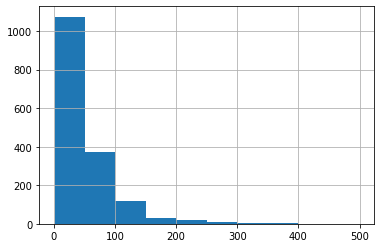

In [20]:
df.len.hist()

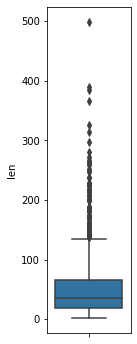

In [21]:
fig_dims = (1.5,6)
fig, ax = plt.subplots(figsize=fig_dims)
sb.boxplot( y="len", data=df)

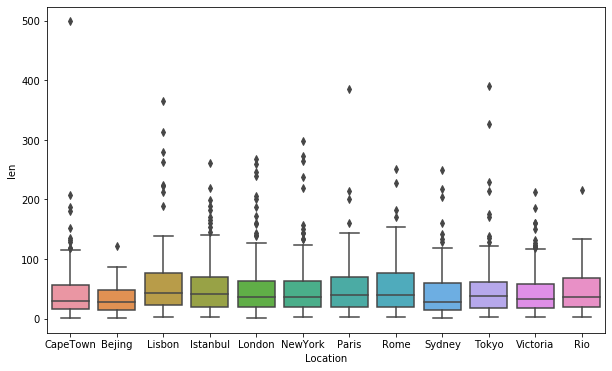

In [22]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sb.boxplot(x="Location", y="len", data=df, ax=ax)

In [23]:
import nltk
from nltk.tokenize import word_tokenize

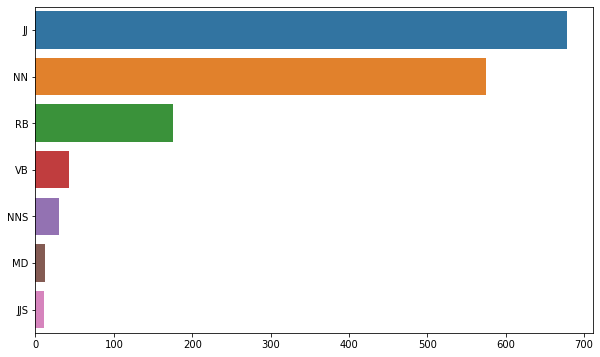

In [32]:
s=[]
for i in df.review_clean:
    if((detect(i))=='en'):
        token=nltk.word_tokenize(i)
        r=(nltk.pos_tag(token))
        s.append(r)
k=[]
for item in list(next(iter(zip(*s)))):
    d=item[1]
    k.append(d)
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
counter=Counter(k)
x,y=list(map(list,zip(*counter.most_common(7))))
sb.barplot(x=y,y=x,ax=ax)

In [35]:
import spacy
nlp = spacy.load('en_core_web_lg', parse=True, tag=True, entity=True)

In [45]:
df['noun']=""
df['verb']=""
df['Adj']=""
for x in (range(len(df['review_clean']))):
    lines = str(df['review_clean'].iloc[x])
    doc =nlp(lines)
    str1=" "
    str2=" "
    for token in doc:
        if token.pos_ is 'NOUN':
            str1=str1+ " "+token.text
            df['noun'].iloc[x]=str1
        if token.pos_ is 'VERB':
            str2= str2 + " " +token.text
            df['verb'].iloc[x]=str2
        if token.pos_ is 'ADJ':
            str2= str2 + " " +token.text
            df['Adj'].iloc[x]=str2
            
df

C:\Users\sarka\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sarka\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sarka\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,listing_id,review_scores_rating,id,date,reviewer_id,reviewer_name,comments,Location,Languagereveiw,review_clean,len,noun,verb,Adj
292435,28591287,96.0,419948283,2019-03-05,28155739,Johan Frederik,"Lovely place, stylishly decorated, with flair,...",CapeTown,en,lovely place stylishly decorate flair top amen...,13,place flair amenity calm,lovely decorate,lovely decorate top spacious
5809,782166,98.0,459262864,2019-05-27,127801969,Rennie,My daughter and I really enjoyed our stay with...,CapeTown,en,daughter really enjoyed stay chris jenny lovel...,25,daughter bed location host thanks,enjoyed stay,enjoyed stay comfy great super much
41540,4592418,93.0,67777828,2016-03-31,55455738,Dylan,"Great place to stay! Easy checkin, very clean,...",CapeTown,en,great place stay easy checkin clean well locat...,17,place checkin need,great stay easy clean locate appoint,great stay easy clean
342590,39854675,90.0,598472226,2020-01-27,30258979,Tracey&Gavin,"great apartment- stylish decor, incredibly com...",CapeTown,en,great apartment stylish decor incredibly comfo...,32,apartment decor pillow bed wish note brand l...,great stylish comfortable take perfect long ...,great stylish comfortable take perfect long
326701,34662242,100.0,591012025,2020-01-10,237814757,Tashwill,Smooth effortless booking and outstanding comm...,CapeTown,en,smooth effortless book outstanding communicati...,13,book communication host apartment,smooth effortless outstanding maintain,smooth effortless outstanding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27191,844149,86.0,320323484,2018-09-08,79909286,George,This was my second time staying at Dani’s plac...,Rio,en,second time stay dani’s place can’t say enough...,53,time place location step apartment host time,second stay ca say enough perfect close need...,second stay ca say enough perfect close need...
116499,5012100,99.0,87996444,2016-07-22,24008204,Rodrigo,Janaina was really welcoming and everything ra...,Rio,en,janaina really welcome everything run perfectly,8,,welcome run,
9375,273463,96.0,10231015,2014-02-08,6761052,Tais,The apartment and the host are what Rio de Jan...,Rio,en,apartment host rio janeiro great view friendly...,81,host people host suggestion instruction neig...,great friendly help share get close make sma...,great friendly help share get close make sma...
208102,14279743,96.0,214037717,2017-11-24,608614,John,"Wonderful space, excellent location.",Rio,en,wonderful space excellent location,4,space location,,wonderful excellent


In [46]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] =1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

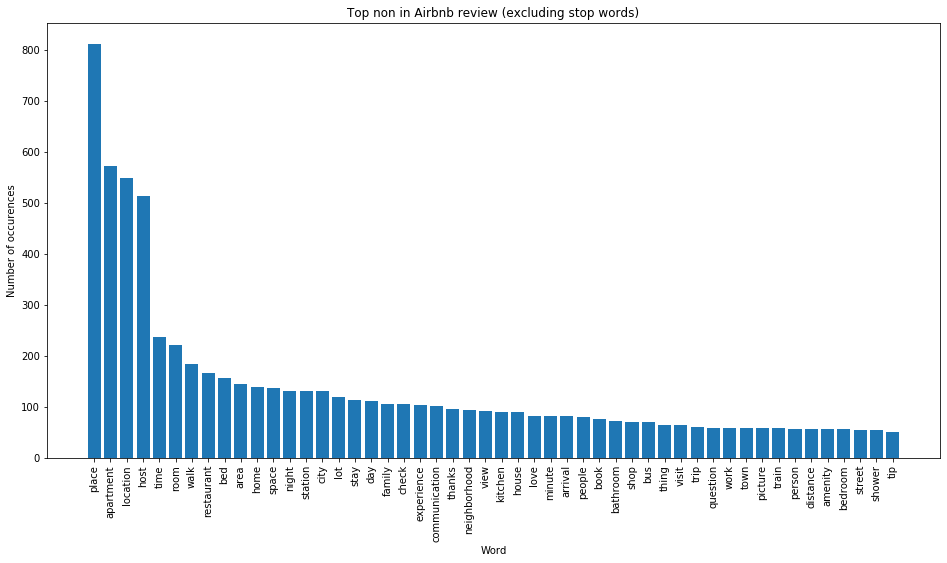

In [47]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=50,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['noun'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top non in Airbnb review (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

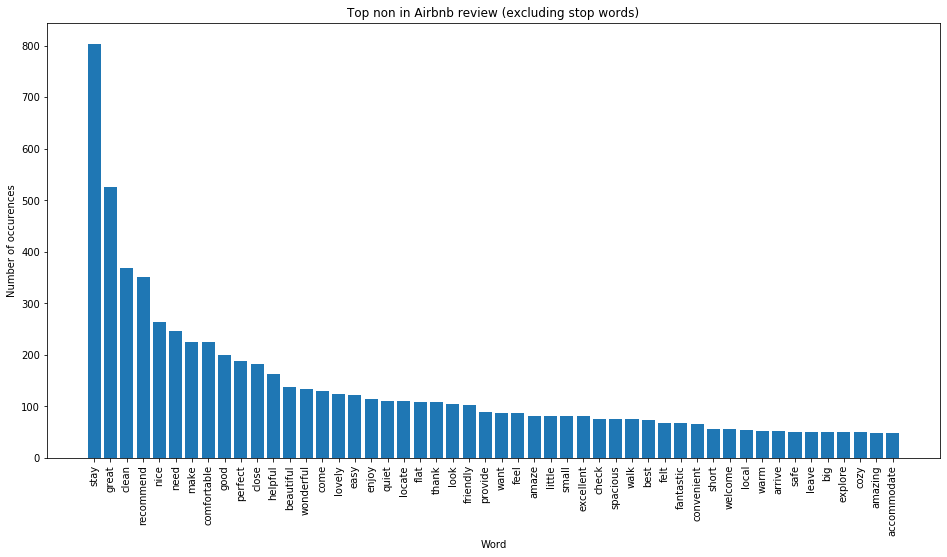

In [48]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=50,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['verb'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top non in Airbnb review (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

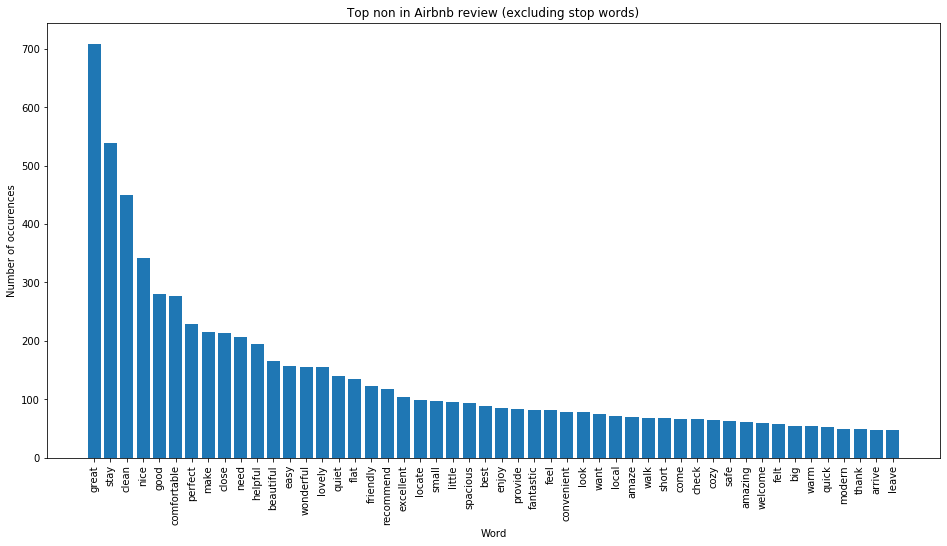

In [49]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=50,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['Adj'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top non in Airbnb review (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [50]:
from nltk.util import ngrams

In [51]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

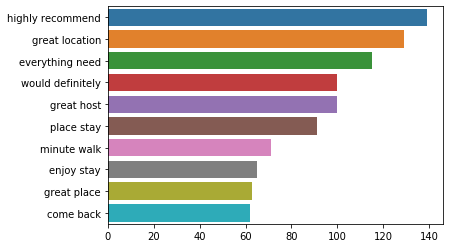

In [55]:
top_n_bigrams=get_top_ngram(df['review_clean'], n=2)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sb.barplot(x=y,y=x)

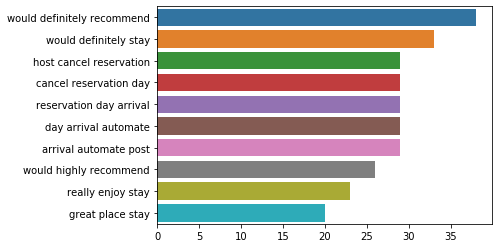

In [59]:
top_n_bigrams=get_top_ngram(df['review_clean'], n=3)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sb.barplot(x=y,y=x)